In [1]:
# Plot style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Latin Modern"
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.major.size"] = 3
plt.rcParams["ytick.major.size"] = 3


# Lexical Perturbations

In [2]:
import pandas as pd

# Load Results Tables
mmlu_lexical_results_df = pd.read_csv("../../data/result_tables/mmlu_lexical.csv")
squad_lexical_results_df = pd.read_csv("../../data/result_tables/squad_lexical.csv")
amega_lexical_results_df = pd.read_csv("../../data/result_tables/amega_lexical.csv")

dfs = {
    "(a) MMLU": mmlu_lexical_results_df,
    "(b) SQuAD": squad_lexical_results_df,
    "(c) AMEGA": amega_lexical_results_df,
}

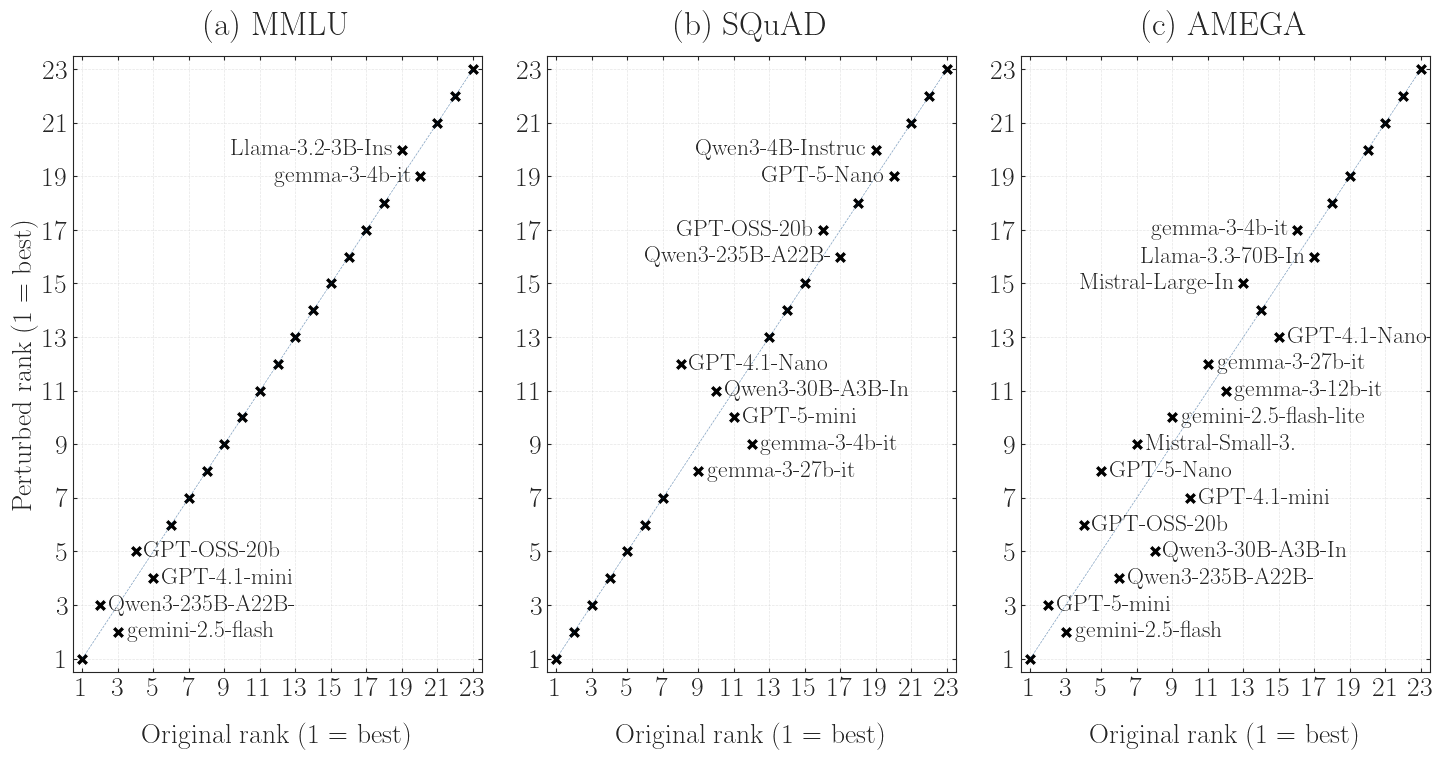

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "rank_original"
    y_col = "rank_lexical"
    if label == "(b) SQuAD":
        x_col += "_sas"
        y_col += "_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )

    axes[i].set_title(label, pad=15)
    axes[i].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    axes[i].set_xlabel("Original rank (1 = best)", labelpad=15)
    if i == 0:
        axes[i].set_ylabel("Perturbed rank (1 = best)")
    else:
        axes[i].set_ylabel("")
    axes[i].set_xlim(0.5, 23.5)
    axes[i].set_ylim(0.5, 23.5)
    axes[i].set_xticks(range(1, 24, 2))
    axes[i].set_yticks(range(1, 24, 2))
    n = len(df)
    axes[i].plot([1, n], [1, n], "--", c="#004282", linewidth=0.5, alpha=0.5)

    texts = []
    for _, row in df.iterrows():
        if abs(row[x_col] - row[y_col]) >= 1:
            if row[y_col] < 14:
                ha = "left"
                x_offset = 0.5
            else:
                ha = "right"
                x_offset = -0.5
            if row["model"] == "gemini-2.5-flash-lite":
                model_name = "gemini-2.5-flash-lite"
            else:
                model_name = row["model"][:16]
            texts.append(axes[i].text(row[x_col] + x_offset, row[y_col], model_name, fontsize=17, ha=ha, va="center"))

plt.tight_layout()
fig.savefig("../../figs/lexical_rank_plots.pdf", bbox_inches="tight", dpi=300)
plt.show()


# Syntactic Perturbations

In [4]:
# Load Results Tables
mmlu_syntactic_results_df = pd.read_csv("../../data/result_tables/mmlu_syntactic.csv")
squad_syntactic_results_df = pd.read_csv("../../data/result_tables/squad_syntactic.csv")
amega_syntactic_results_df = pd.read_csv("../../data/result_tables/amega_syntactic.csv")

dfs = {
    "(a) MMLU": mmlu_syntactic_results_df,
    "(b) SQuAD": squad_syntactic_results_df,
    "(c) AMEGA": amega_syntactic_results_df,
}

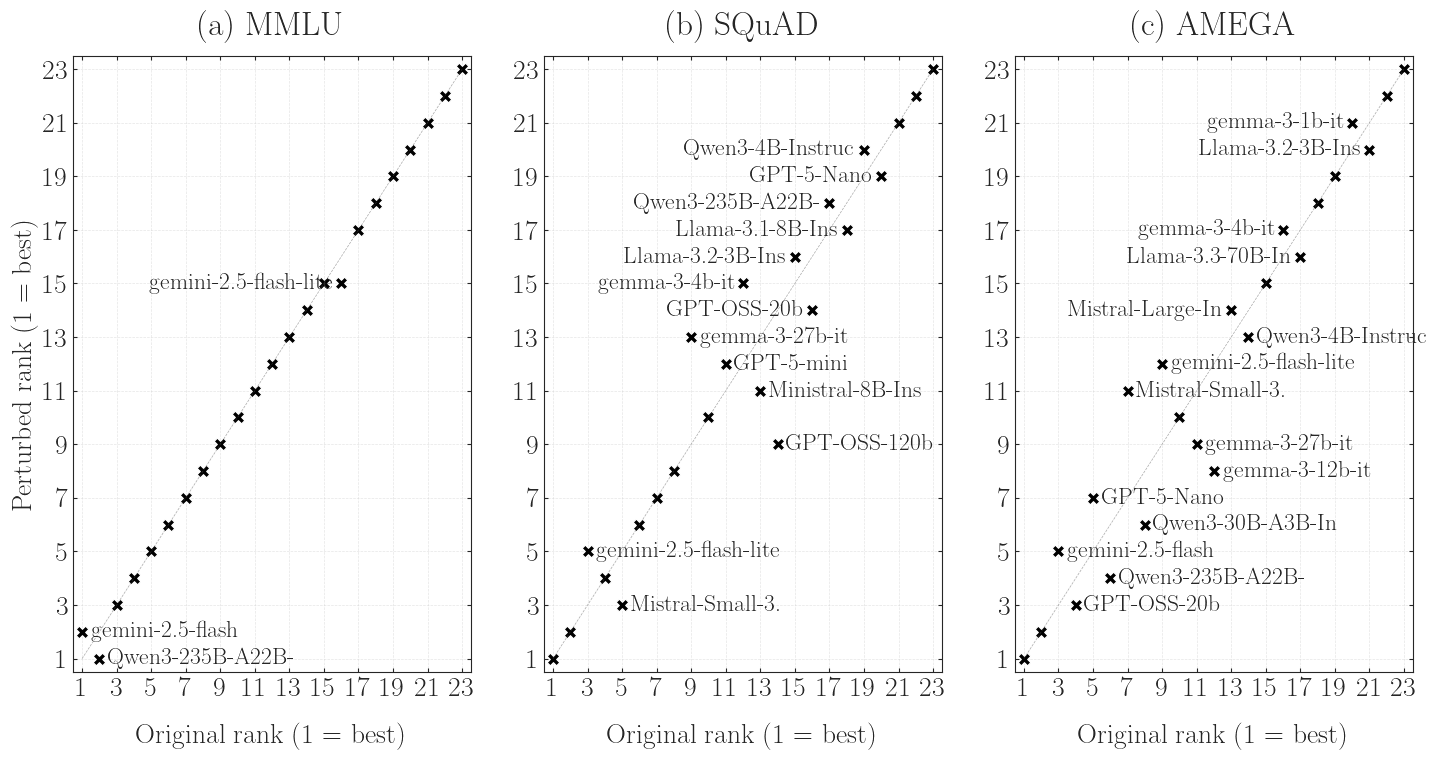

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "rank_original"
    y_col = "rank_syntactic"
    if label == "(b) SQuAD":
        x_col += "_sas"
        y_col += "_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )

    axes[i].set_title(label, pad=15)
    axes[i].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    axes[i].set_xlabel("Original rank (1 = best)", labelpad=15)
    if i == 0:
        axes[i].set_ylabel("Perturbed rank (1 = best)")
    else:
        axes[i].set_ylabel("")
    axes[i].set_xlim(0.5, 23.5)
    axes[i].set_ylim(0.5, 23.5)
    axes[i].set_xticks(range(1, 24, 2))
    axes[i].set_yticks(range(1, 24, 2))
    n = len(df)
    axes[i].plot([1, n], [1, n], "--", c="#555555", linewidth=0.5, alpha=0.5)

    texts = []
    for _, row in df.iterrows():
        if abs(row[x_col] - row[y_col]) >= 1:
            if row[y_col] < 14:
                ha = "left"
                x_offset = 0.5
            else:
                ha = "right"
                x_offset = -0.5
            if row["model"] == "gemini-2.5-flash-lite":
                model_name = "gemini-2.5-flash-lite"
            else:
                model_name = row["model"][:16]
            texts.append(axes[i].text(row[x_col] + x_offset, row[y_col], model_name, fontsize=17, ha=ha, va="center"))

plt.tight_layout()
fig.savefig("../../figs/syntactic_rank_plots.pdf", bbox_inches="tight", dpi=300)
plt.show()

# Detailed Plots

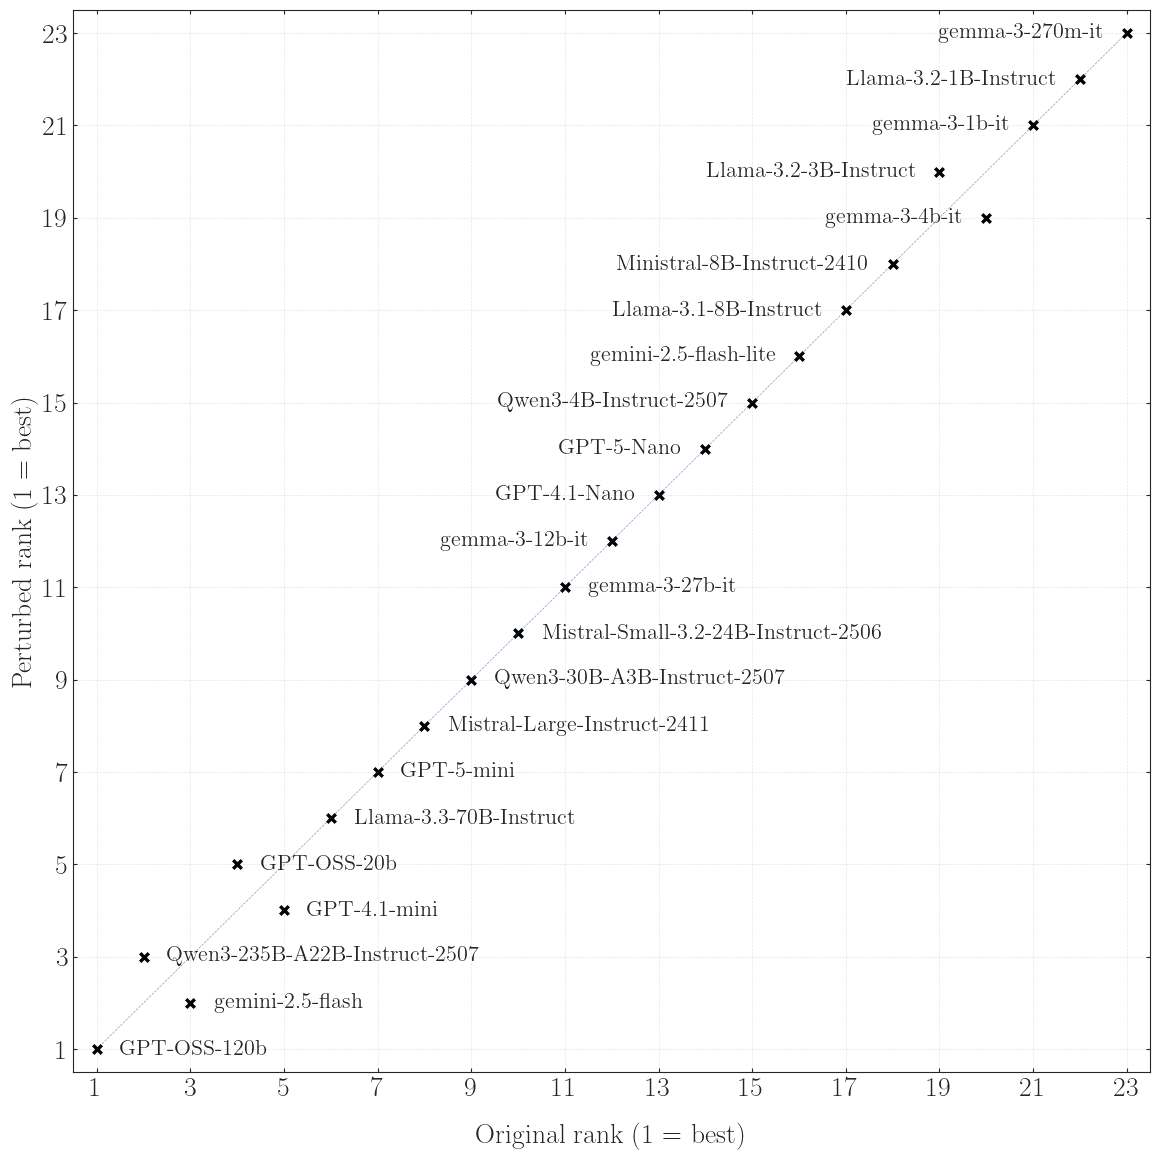

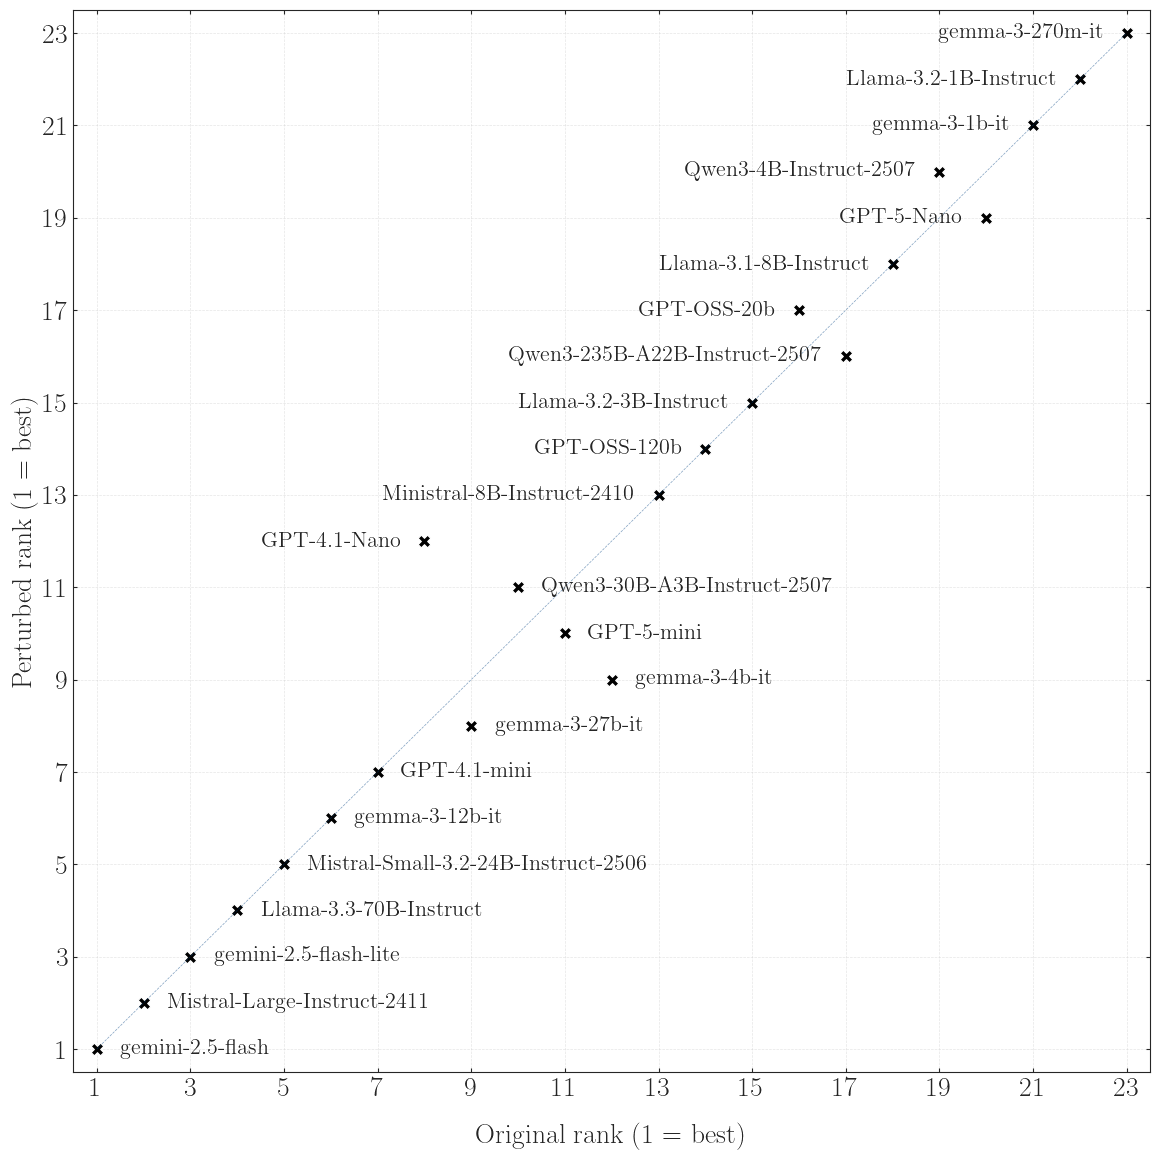

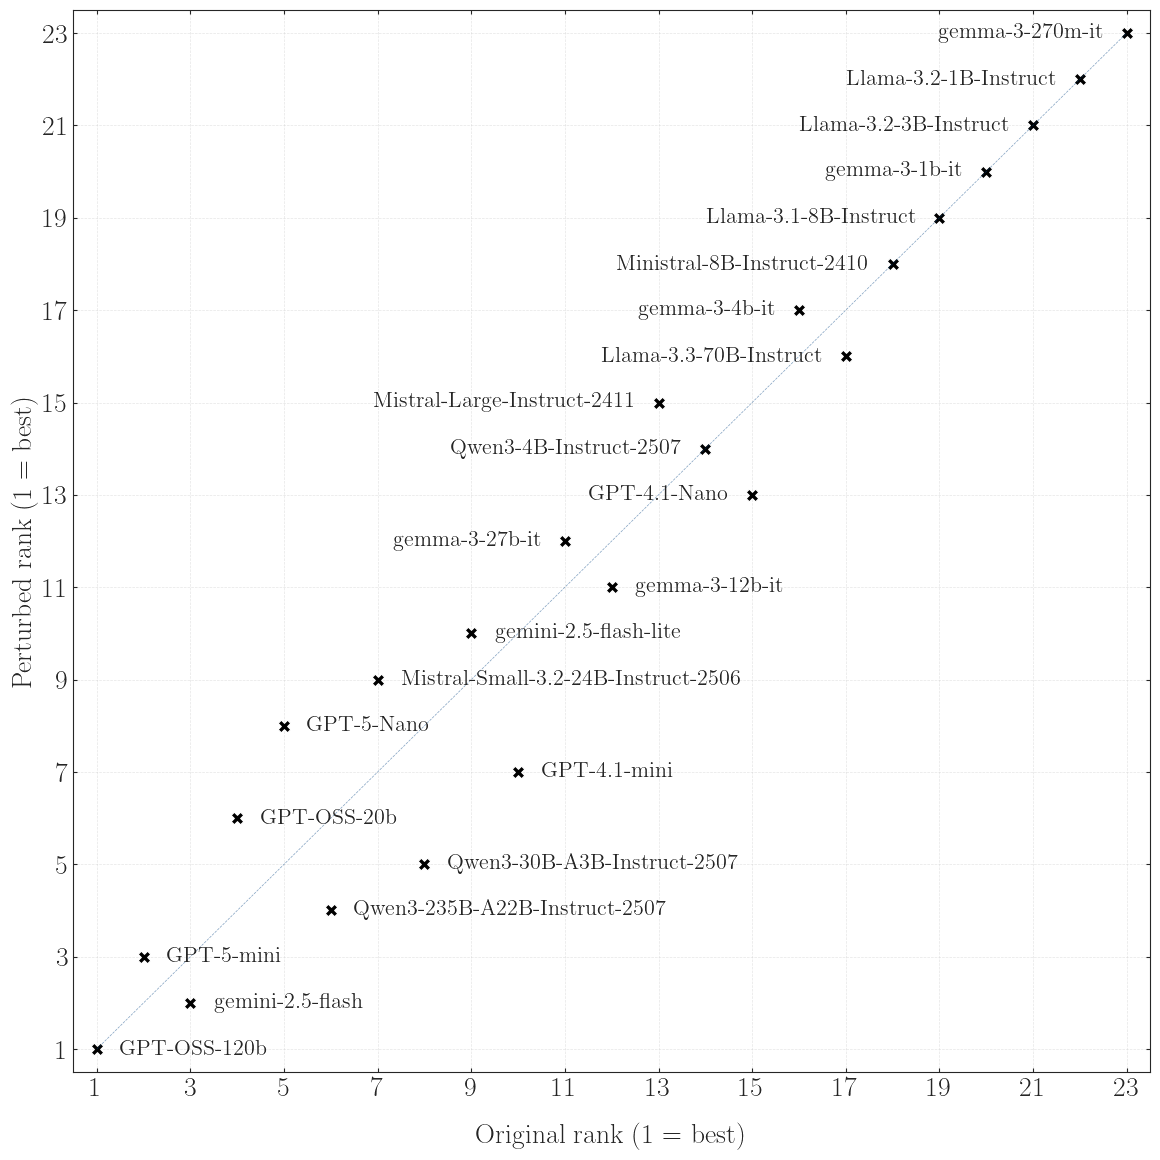

In [6]:
# Detailed lexical plots with all model labels per subplot
label_to_key = {"(a) MMLU": "mmlu", "(b) SQuAD": "squad", "(c) AMEGA": "amega"}
dfs_lexical = {
    "(a) MMLU": mmlu_lexical_results_df,
    "(b) SQuAD": squad_lexical_results_df,
    "(c) AMEGA": amega_lexical_results_df,
}
for label, df in dfs_lexical.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    x_col = "rank_original"
    y_col = "rank_lexical"
    if label == "(b) SQuAD":
        x_col += "_sas"
        y_col += "_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=ax,
        legend=False,
    )

    ax.set_title("", pad=15)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_xlabel("Original rank (1 = best)", labelpad=15)
    ax.set_ylabel("Perturbed rank (1 = best)")
    ax.set_xlim(0.5, 23.5)
    ax.set_ylim(0.5, 23.5)
    ax.set_xticks(range(1, 24, 2))
    ax.set_yticks(range(1, 24, 2))

    n = len(df)
    ax.plot([1, n], [1, n], "--", c="#004282", linewidth=0.5, alpha=0.5)

    for _, row in df.iterrows():
        ha = "left" if row[y_col] < 12 else "right"
        x_offset = 0.5 if ha == "left" else -0.5
        model_name = row["model"]
        ax.text(row[x_col] + x_offset, row[y_col], model_name, fontsize=16, ha=ha, va="center")

    plt.tight_layout()
    out_name = f"../../figs/lexical_rank_plot_all_{label_to_key[label]}.pdf"
    fig.savefig(out_name, bbox_inches="tight", dpi=300)
    plt.show()


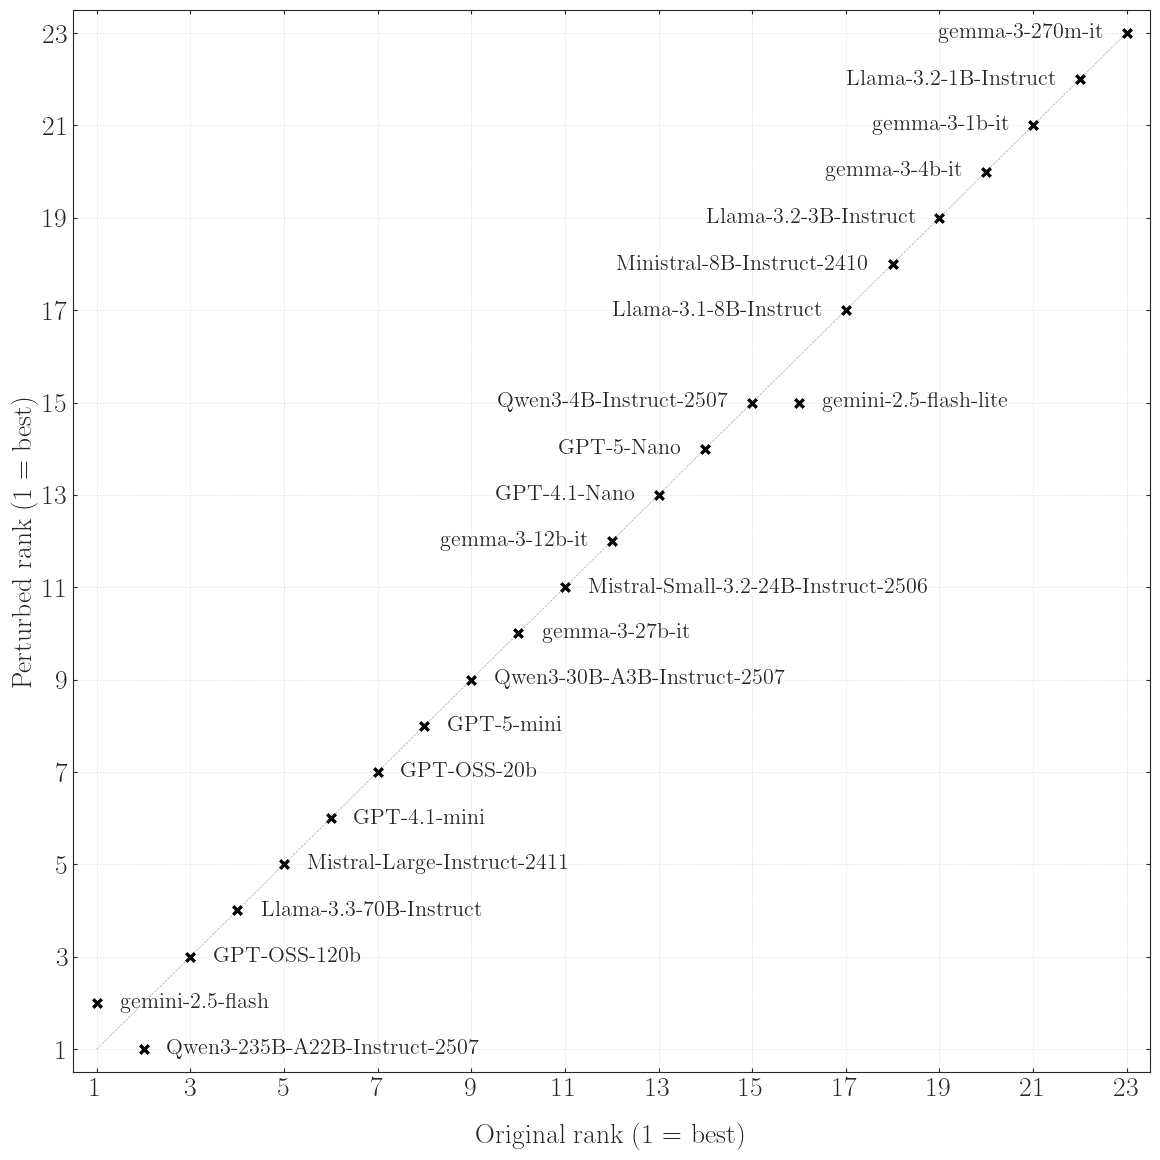

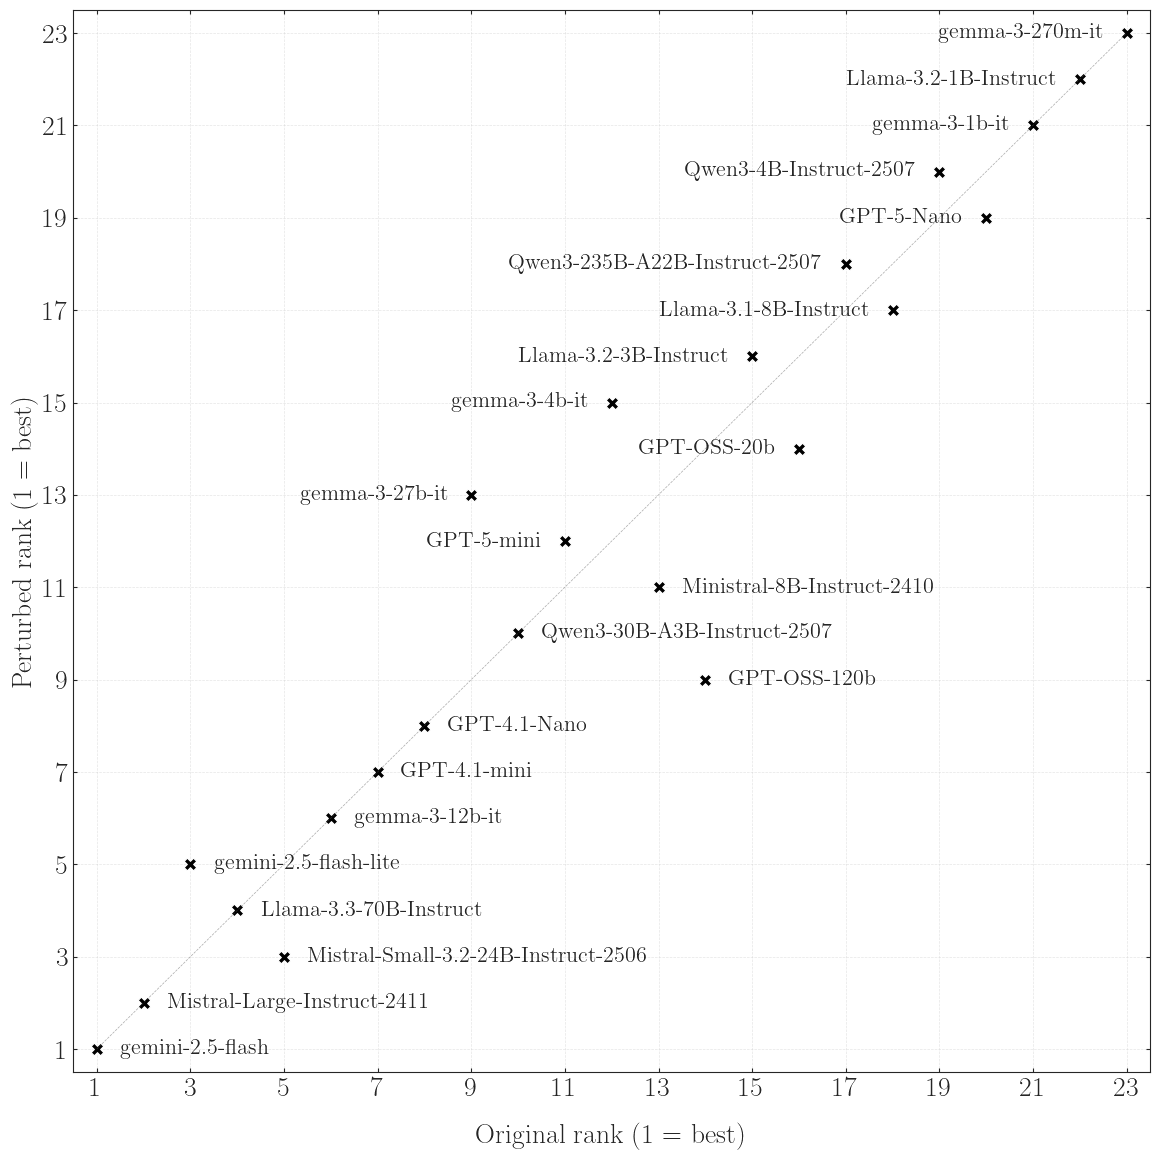

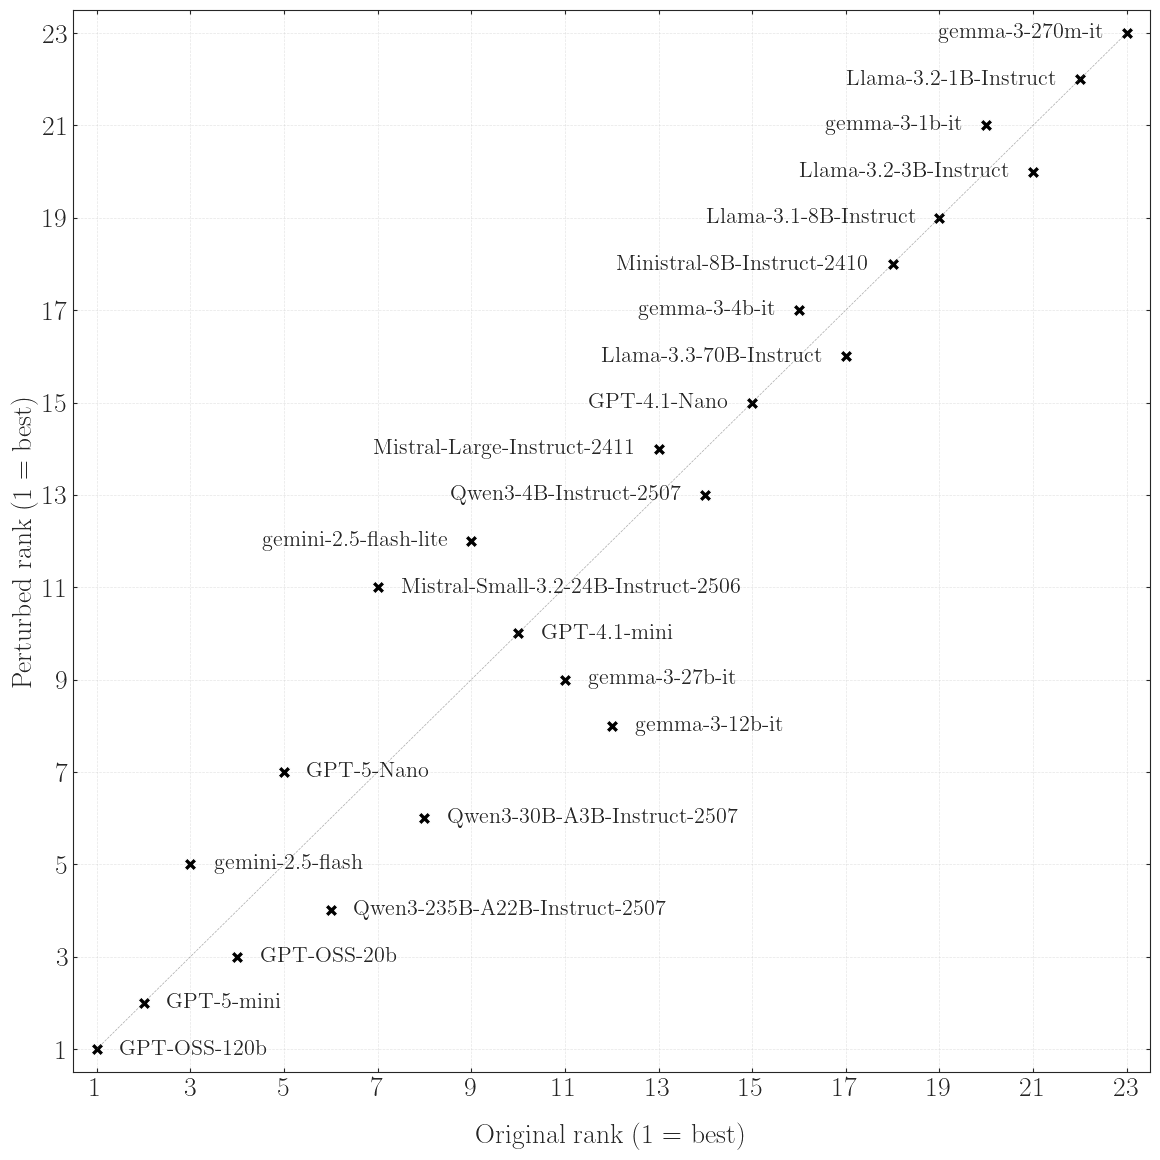

In [7]:
# Detailed syntactic plots with all model labels per subplot
dfs_syntactic = {
    "(a) MMLU": mmlu_syntactic_results_df,
    "(b) SQuAD": squad_syntactic_results_df,
    "(c) AMEGA": amega_syntactic_results_df,
}
for label, df in dfs_syntactic.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    x_col = "rank_original"
    y_col = "rank_syntactic"
    if label == "(b) SQuAD":
        x_col += "_sas"
        y_col += "_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=ax,
        legend=False,
    )

    ax.set_title("", pad=15)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_xlabel("Original rank (1 = best)", labelpad=15)
    ax.set_ylabel("Perturbed rank (1 = best)")
    ax.set_xlim(0.5, 23.5)
    ax.set_ylim(0.5, 23.5)
    ax.set_xticks(range(1, 24, 2))
    ax.set_yticks(range(1, 24, 2))

    n = len(df)
    ax.plot([1, n], [1, n], "--", c="#555555", linewidth=0.5, alpha=0.5)

    for _, row in df.iterrows():
        ha = "left" if row[y_col] < 12 else "right"
        if row["model"] == "gemini-2.5-flash-lite" and label == "(a) MMLU":
            ha = "left"
        x_offset = 0.5 if ha == "left" else -0.5
        model_name = row["model"]
        ax.text(row[x_col] + x_offset, row[y_col], model_name, fontsize=16, ha=ha, va="center")

    plt.tight_layout()
    out_name = f"../../figs/syntactic_rank_plot_all_{label_to_key[label]}.pdf"
    fig.savefig(out_name, bbox_inches="tight", dpi=300)
    plt.show()
